# The Affine Transformation
translation, rotation, scale
### Scale and Rotation
$$M=\begin{pmatrix}
A\cos\theta & -\sin\theta \\ 
\sin\theta & A\cos\theta 
\end{pmatrix}$$  
as an particular example, for a $\times 4$ scale without rotation,
$$Scale(A)=\begin{pmatrix}
A & 0 \\ 
0 & A
\end{pmatrix}$$  
which is the case when $\theta=0$ exactly,  
to give another particular example of rotation, $A$ is set 1,
$$Rot(\theta)=\begin{pmatrix}
\cos\theta & -\sin\theta \\ 
\sin\theta & \cos\theta 
\end{pmatrix}$$  
### Translation
An affine transformation with translation can be given by 
$$\begin{pmatrix}
x'\\y'
\end{pmatrix}=M
\begin{pmatrix}
x\\y
\end{pmatrix}+
\begin{pmatrix}
x_0\\y_0
\end{pmatrix}$$
which is equivalent to 
$$\begin{pmatrix}
x'\\y'
\end{pmatrix}=M'
\begin{pmatrix}
x\\y\\1
\end{pmatrix}$$
if we leave 6 parameters to $M'$, namely,
$$M'=\begin{pmatrix}
A\cos\theta & -\sin\theta & x_0\\ 
\sin\theta & A\cos\theta & y_0
\end{pmatrix}$$ 

common demands are that we specify the scale and rotation about a point.  
we can decompose to three steps :
    1. move the pivot to the origin (change the reference coord)
    2. perform the rotation and scale
    3. move back the origin  
So it's formulated as  

$$\begin{pmatrix}
x'\\y'
\end{pmatrix}=M
\begin{pmatrix}
x-x_0\\y-y_0
\end{pmatrix}+
\begin{pmatrix}
x_0\\y_0
\end{pmatrix}=M
\begin{pmatrix}
x\\y
\end{pmatrix}+(I-M)
\begin{pmatrix}
x_0\\y_0
\end{pmatrix}
$$  

where the identity is symboled by  

$$I=\begin{pmatrix}
1 & 0\\0 & 1
\end{pmatrix}
$$  
the bias term is expanded as  

$$\begin{pmatrix}
1-A\cos\theta & 0+\sin\theta \\ 
0-\sin\theta & 1-A\cos\theta
\end{pmatrix}
\begin{pmatrix}
x_0 \\ y_0
\end{pmatrix}=
\begin{pmatrix}
x_0~(1-A\cos\theta)+y_0\sin\theta \\ -x_0\sin\theta+y_0~(1-A\cos\theta)
\end{pmatrix}
$$  
finally, the affine matrix is given by 
$$M=\begin{pmatrix}
A\cos\theta & -\sin\theta & x_0~(1-A\cos\theta)+y_0\sin\theta\\ 
\sin\theta & A\cos\theta & -x_0\sin\theta+y_0~(1-A\cos\theta)
\end{pmatrix}$$ 

In [1]:
import cv2 as cv
import numpy as np
from matplotlib.pyplot import imshow

### 为了能inline，重写了`show()`，因为opencv是BGR格式

In [2]:
def show(im):
    im = im[:,:,::-1]
    imshow(im)
#     cv.imshow(name,im)
#     cv.waitKey(0)
#     cv.destroyAllWindows()

### pdf上可能写错了，angle是角度，而且是逆时针

In [3]:
M = cv.getRotationMatrix2D(center=(0,0), angle=-30,scale=1)

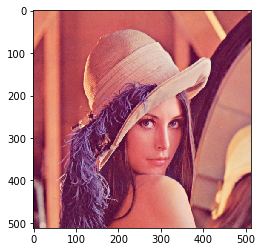

In [4]:
img_path = r'data\lena.jpg'
im = cv.imread(img_path)
%matplotlib inline
show(im)
# cv.imshow('lena', im)
# cv.waitKey(0)
# cv.destroyAllWindows()

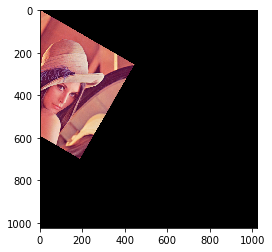

In [5]:
im_af = cv.warpAffine(src=im, M=M, dsize=tuple([2*x for x in im.shape[:2]]))
show(im_af)